# Introdução ao OCR - Parte 1

### Importando as bibliotecas necessárias

In [67]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Obtendo datasets e normalizando os dados

Vamos obter os dados para treino/teste do dataset mnist (API de dados do Keras).
Cada imagem tem somente um canal de output, com 1 byte sendo usado para representar a imagem (ou 8 bits). Portanto, cada pixel pode ser um valor inteiro de 0 a 255.

In [68]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalização para que todos os valores fiquem entre 0 e 1 ao invés de 0 e 255
x_train = x_train / 255.0
x_test = x_test / 255.0

In [69]:
print(f"O número de dígitos de treino é: {x_train.shape[0]}")
print(f"Dimensionalidade ({x_train.shape[1]},{x_train.shape[2]}) pixels para cada imagem")

O número de dígitos de treino é: 60000
Dimensionalidade (28,28) pixels para cada imagem


In [70]:
print(f"O número de dígitos de teste é: {x_test.shape[0]}")
print(f"Dimensionalidade ({x_test.shape[1]},{x_test.shape[2]}) pixels para cada imagem")

O número de dígitos de teste é: 10000
Dimensionalidade (28,28) pixels para cada imagem


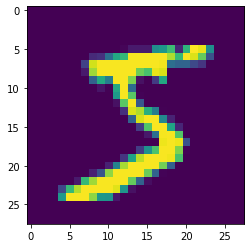

In [71]:
plt.imshow(x_train[0])

In [72]:
print(f"Classificação da imagem acima é: {y_train[0]}")

Classificação da imagem acima é: 5


In [73]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Design do Modelo de Deep Learning

* Redes neurais são construídas considerando junções de vários layers (camadas). Vamos usar um modelo com três camadas. Para informações da API de Layers do Keras, ver https://keras.io/api/layers/.
* Primeiro Layer: tf.keras.layers.Flatten converte nossos arrays (28 x 28) em um array unidimensional (28 x 28 = 784). 
* Segundo e Terceiro Layers: tf.keras.layers.Dense. O segundo layer tem 128 neurons e o terceiro tem 10 neurons (pois temos números de 0 a 9), onde teremos como retorno 10 scores de probabilidade para identificar os dígitos.
* Por fim, devemos definir as funções de ativação da Rede Neural (ver https://www.tensorflow.org/api_docs/python/tf/keras/activations para mais opções das que usamos aqui).

In [76]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

### Otimização e Loss Function

* Agora que definimos os layers (estrutura) do nosso modelo, precisamos de mais 2 parâmetros. A função perda e o otimizador.
* A função perda (ou Loss Function) basicamente é o parâmetro quantitativo que irá avaliar quão preciso (próximo dos resultados corretos) nosso modelo está a cada iteração.
* O otimizador é um algoritmo (como Gradiente Descendente ou Algoritmos Genéticos) que implementa uma forma de fazer com que o modelo "aprenda" de forma mais eficiente.

In [93]:
model.compile(optimizer='adam', # Otimizador
              loss='sparse_categorical_crossentropy', # Loss Function
              metrics=['accuracy']) # Métrica de performance

### Mãos a obra! Treinando o modelo

In [78]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 901us/step - loss: 0.4265 - accuracy: 0.8795
Epoch 2/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.1207 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.0799 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.0571 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.0432 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.0301 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.0283 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.0212 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.0154 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 2s 898u

### Avaliando performance no dataset de testes

In [79]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 0s 782us/step - loss: 0.0764 - accuracy: 0.9810


[0.07637955993413925, 0.9810000061988831]

## Vamos fazer alguns testes...

In [80]:
predictions = model.predict(x_test)
predictions[0]

array([4.70945110e-07, 6.14524681e-11, 1.02991375e-08, 3.73113653e-05,
       3.09016487e-15, 1.13486195e-07, 1.07346323e-14, 9.99959111e-01,
       1.20472350e-07, 2.88634988e-06], dtype=float32)

In [91]:
np.argmax(predictions[4])

4

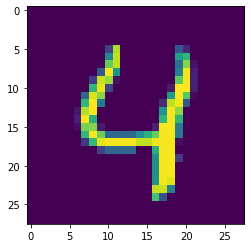

In [92]:
plt.imshow(x_test[4])

Códigos e texto inspirados no post de https://medium.com/swlh/build-your-first-neural-network-for-image-classification-in-keras-3457011ce4b3